In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('/kaggle/input/cw-ml-dataset/Breast_Cancer_Mortality_Survival_Dataset.csv')
print('done !')

done !


In [2]:
# First Model -  Predictive machine-learning model for breast cancer mortality status.
# NB - Naïve Bayes
# LR - Logistic Regression
# KNN - K Nearest Neighbors


# I have changed the column headers of the dataset (putting underscore [_] instead of space) . 

In [3]:
print('Before conversion :\n',data.columns)
# Replace spaces in column headers with underscores
data.columns = data.columns.str.replace(' ', '_')

print('After conversion :\n',data.columns)

# Save the updated dataframe to a new CSV file (optional)
data.to_csv('/kaggle/working/Updated_Dataset.csv', index=False)


Before conversion :
 Index(['Patient ID ', 'Moth of Birth', 'Age', 'Sex', 'Race', 'Marital Status',
       'Occupation Code', 'Adopted Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Mortality_Status'],
      dtype='object')
After conversion :
 Index(['Patient_ID_', 'Moth_of_Birth', 'Age', 'Sex', 'Race', 'Marital_Status',
       'Occupation_Code', 'Adopted_Status', 'T_Stage_', 'N_Stage', '6th_Stage',
       'differentiate', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status'],
      dtype='object')


In [4]:
# Check for missing values and data types
missing_values = data.isnull().sum()
print('Missing values:\n', missing_values)

# Drop irrelevant features
data = data.drop(columns=['Patient_ID_', 'Moth_of_Birth'])

# Standardize the target variable
data['Mortality_Status'] = data['Mortality_Status'].str.strip().str.lower()
data['Mortality_Status'] = data['Mortality_Status'].replace({'alive': 0, 'dead': 1})

# Handle missing values
numerical_columns = ['Age', 'Occupation_Code', 'Tumor_Size', 'Regional_Node_Examined']
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Ensure numeric conversion
    data[col] = data[col].fillna(data[col].median())

data['Sex'] = data['Sex'].fillna(data['Sex'].mode()[0])
data = data.dropna(subset=['Mortality_Status'])
print('Data cleaning completed!')


Missing values:
 Patient_ID_                0
Moth_of_Birth              0
Age                        9
Sex                       77
Race                       0
Marital_Status             0
Occupation_Code            3
Adopted_Status             0
T_Stage_                   0
N_Stage                    0
6th_Stage                  0
differentiate              0
Grade                      0
A_Stage                    0
Tumor_Size                 3
Estrogen_Status            0
Progesterone_Status        0
Regional_Node_Examined     1
Reginol_Node_Positive      0
Survival_Months            0
Mortality_Status           4
dtype: int64
Data cleaning completed!


/tmp/ipykernel_17/2478455111.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Mortality_Status'] = data['Mortality_Status'].replace({'alive': 0, 'dead': 1})


In [5]:
# Apply the filtering conditions
df = data[
    (data['Age'] >= 18) & (data['Age'] <= 85) & 
    (data['Tumor_Size'] >= 1.0) & (data['Tumor_Size'] <= 250.0) & 
    (data['Regional_Node_Examined'] >= 0.0) & (data['Regional_Node_Examined'] <= 50.0) 
]

# Display the filtered dataframe to verify
print(df)

# Save the filtered dataframe to a new CSV file (optional)
df.to_csv('/kaggle/working/Filtered_Dataset.csv', index=False)


       Age     Sex   Race Marital_Status  Occupation_Code  Adopted_Status  \
0     68.0  Female  White        Married             11.0               1   
1     50.0  Female  White        Married             11.0               0   
2     58.0  Female  White       Divorced              9.0               0   
3     58.0  Female  White        Married             10.0               0   
4     47.0  Female  White        Married             12.0               0   
...    ...     ...    ...            ...              ...             ...   
4019  62.0  Female  Other        Married              8.0               1   
4020  56.0  Female  White       Divorced              3.0               0   
4021  68.0  Female  White        Married              2.0               1   
4022  58.0  Female  Black       Divorced              8.0               0   
4023  46.0  Female  White        Married             11.0               1   

     T_Stage_ N_Stage 6th_Stage              differentiate  Grade   A_Stage

In [6]:
print(df.columns)

Index(['Age', 'Sex', 'Race', 'Marital_Status', 'Occupation_Code',
       'Adopted_Status', 'T_Stage_', 'N_Stage', '6th_Stage', 'differentiate',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status'],
      dtype='object')


In [7]:
# Convert non-numeric entries in numerical columns
numerical_features = ['Age', 'Occupation_Code', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive']

for col in numerical_features:
    df[col] = df[col].replace('One', 1)  # Replace 'One' with 1
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric and set invalid entries to NaN
    df[col] = df[col].fillna(df[col].median())  # Fill missing values with median

print("Non-numeric values handled successfully!")

from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print('Numerical features scaled successfully!')


Non-numeric values handled successfully!
Numerical features scaled successfully!


/tmp/ipykernel_17/3973463872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace('One', 1)  # Replace 'One' with 1
/tmp/ipykernel_17/3973463872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric and set invalid entries to NaN
/tmp/ipykernel_17/3973463872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
categorical_features = ['Sex', 'Race', 'Marital_Status', 'T_Stage_', 'N_Stage', 
                        '6th_Stage', 'differentiate', 'Estrogen_Status', 'Progesterone_Status', 'A_Stage']
label_encoders = {col: LabelEncoder() for col in categorical_features}

for col in categorical_features:
    df[col] = label_encoders[col].fit_transform(df[col])

# Scale numerical features
numerical_features = ['Age', 'Occupation_Code', 'Tumor_Size', 
                      'Regional_Node_Examined', 'Reginol_Node_Positive']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print('Encoding and scaling completed!')


/tmp/ipykernel_17/321295720.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoders[col].fit_transform(df[col])
/tmp/ipykernel_17/321295720.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoders[col].fit_transform(df[col])
/tmp/ipykernel_17/321295720.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Encoding and scaling completed!


/tmp/ipykernel_17/321295720.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [9]:
# Define features and target
X = df.drop(columns=['Mortality_Status', 'Survival_Months'])  # Features
y = df['Mortality_Status']  # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f'Training set: {X_train.shape}, Test set: {X_test.shape}')


Training set: (3207, 17), Test set: (802, 17)


In [10]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_lr = logistic_model.predict(X_test)
y_pred_proba_lr = logistic_model.predict_proba(X_test)[:, 1]

# print(y_pred_lr)
# print(y_pred_proba_lr)
print('Logistic Regression model trained successfully!')


Logistic Regression model trained successfully!


In [11]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Evaluation metrics
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print('Confusion Matrix:\n', conf_matrix_lr)
print('Classification Report:\n', classification_report_lr)
print('ROC AUC Score:', roc_auc_lr)


Confusion Matrix:
 [[670   9]
 [105  18]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       679
         1.0       0.67      0.15      0.24       123

    accuracy                           0.86       802
   macro avg       0.77      0.57      0.58       802
weighted avg       0.83      0.86      0.82       802

ROC AUC Score: 0.7386639845779901


In [12]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

print(nb_model)

GaussianNB()


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Train an untuned Logistic Regression model
untuned_lr_model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')  # Default solver
untuned_lr_model.fit(X_train, y_train)

# Predict on the test set
untuned_y_pred_lr = untuned_lr_model.predict(X_test)
untuned_y_pred_proba_lr = untuned_lr_model.predict_proba(X_test)[:, 1]

# Evaluate the untuned model
print("Confusion Matrix (Untuned Logistic Regression):")
print(confusion_matrix(y_test, untuned_y_pred_lr))
print("\nClassification Report (Untuned Logistic Regression):")
print(classification_report(y_test, untuned_y_pred_lr))
print("\nROC-AUC (Untuned Logistic Regression):", roc_auc_score(y_test, untuned_y_pred_proba_lr))



Confusion Matrix (Untuned Logistic Regression):
[[670   9]
 [104  19]]

Classification Report (Untuned Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92       679
         1.0       0.68      0.15      0.25       123

    accuracy                           0.86       802
   macro avg       0.77      0.57      0.59       802
weighted avg       0.84      0.86      0.82       802


ROC-AUC (Untuned Logistic Regression): 0.7376941221547708


In [14]:
# Predict on the test set with the untuned model
untuned_y_pred_lr = untuned_lr_model.predict(X_test)
untuned_y_pred_proba_lr = untuned_lr_model.predict_proba(X_test)[:, 1]

# Evaluate the untuned model
print("Confusion Matrix (Untuned Logistic Regression):")
print(confusion_matrix(y_test, untuned_y_pred_lr))
print("\nClassification Report (Untuned Logistic Regression):")
print(classification_report(y_test, untuned_y_pred_lr))
print("\nROC-AUC (Untuned Logistic Regression):", roc_auc_score(y_test, untuned_y_pred_proba_lr))


Confusion Matrix (Untuned Logistic Regression):
[[670   9]
 [104  19]]

Classification Report (Untuned Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92       679
         1.0       0.68      0.15      0.25       123

    accuracy                           0.86       802
   macro avg       0.77      0.57      0.59       802
weighted avg       0.84      0.86      0.82       802


ROC-AUC (Untuned Logistic Regression): 0.7376941221547708


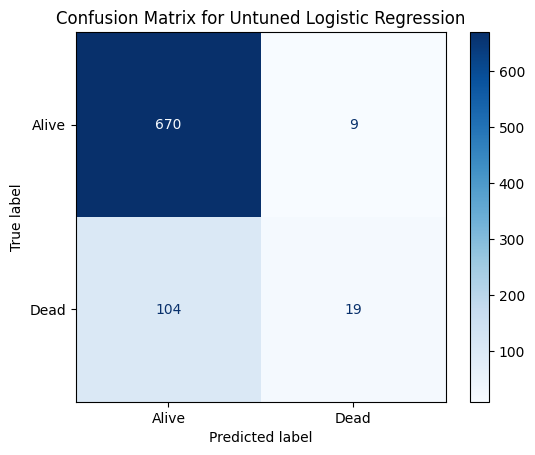

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train untuned Logistic Regression
untuned_lr_model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')  # Untuned model
untuned_lr_model.fit(X_train, y_train)

# Confusion matrix for untuned Logistic Regression
disp = ConfusionMatrixDisplay.from_estimator(untuned_lr_model, X_test, y_test, display_labels=['Alive', 'Dead'], cmap='Blues')
plt.title("Confusion Matrix for Untuned Logistic Regression")
plt.show()



Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'saga'}
Best score for Logistic Regression: 0.8565612531043298


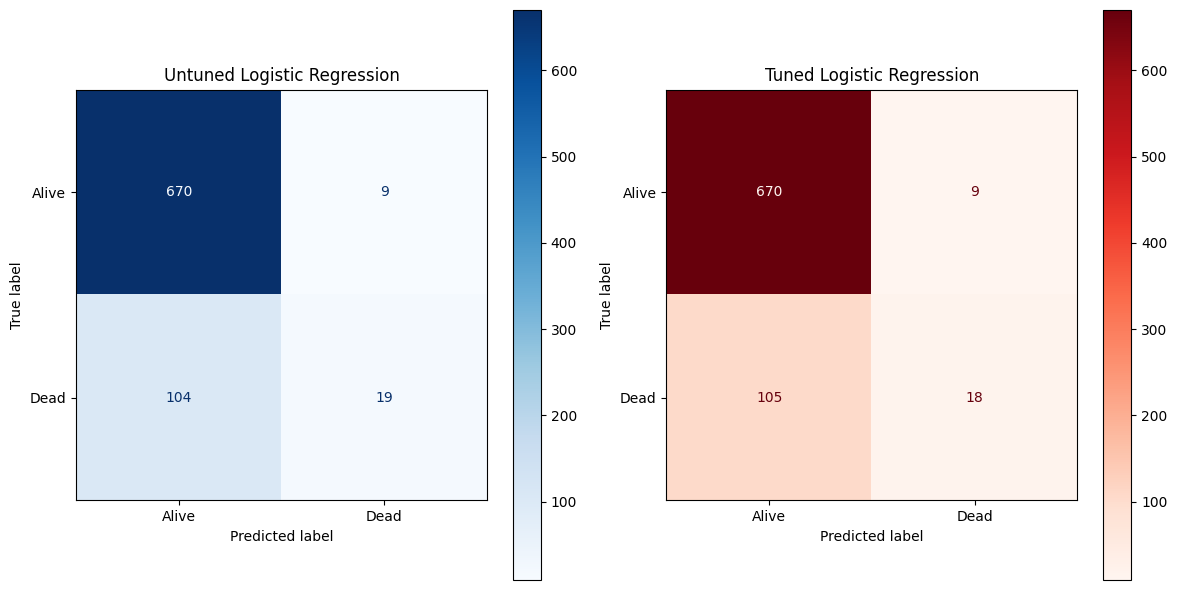

In [16]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# # Confusion matrix for untuned Logistic Regression
# ConfusionMatrixDisplay.from_estimator(untuned_lr_model, X_test, y_test, display_labels=['Alive', 'Dead'], cmap='Blues', ax=axes[0])
# axes[0].set_title("Untuned Logistic Regression")

# # Confusion matrix for tuned Logistic Regression
# ConfusionMatrixDisplay.from_estimator(grid_lr.best_estimator_, X_test, y_test, display_labels=['Alive', 'Dead'], cmap='Blues', ax=axes[1])
# axes[1].set_title("Tuned Logistic Regression")

# plt.tight_layout()
# plt.show()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
lr_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}

# Create and fit GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid=lr_params, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Best score for Logistic Regression:", grid_lr.best_score_)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix for untuned Logistic Regression
disp = ConfusionMatrixDisplay.from_estimator(untuned_lr_model, X_test, y_test, display_labels=['Alive', 'Dead'], cmap='Blues', ax=axes[0])
axes[0].set_title("Untuned Logistic Regression")


# Confusion matrix for tuned Logistic Regression
ConfusionMatrixDisplay.from_estimator(grid_lr.best_estimator_, X_test, y_test, display_labels=['Alive', 'Dead'], cmap='Reds', ax=axes[1])
axes[1].set_title("Tuned Logistic Regression")

plt.tight_layout()
plt.show()


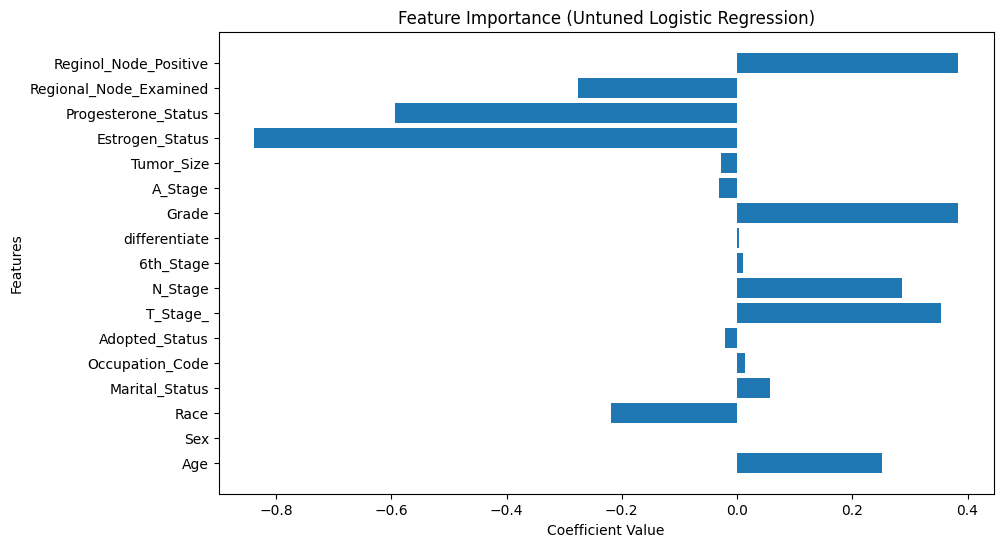

In [17]:
# Extract feature importance from the untuned Logistic Regression model
importance = untuned_lr_model.coef_[0]  
features = X_train.columns 

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.title("Feature Importance (Untuned Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()


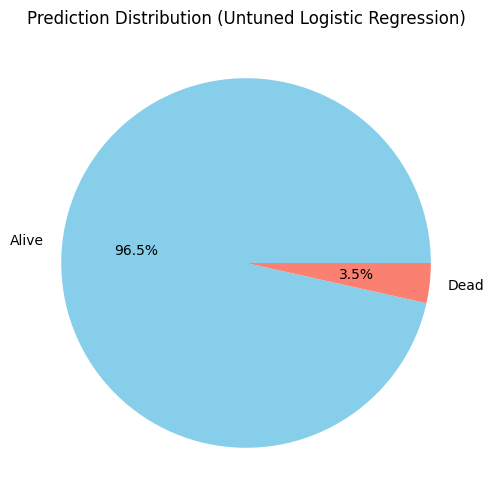

In [18]:
# Generate predictions using the untuned Logistic Regression model
predictions = untuned_lr_model.predict(X_test)

# Count occurrences of each class
unique, counts = np.unique(predictions, return_counts=True)

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=['Alive', 'Dead'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Prediction Distribution (Untuned Logistic Regression)")
plt.show()


In [19]:
# Display feature names and dataset shapes
print("Feature Names:", X_train.columns.tolist())
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Feature Names: ['Age', 'Sex', 'Race', 'Marital_Status', 'Occupation_Code', 'Adopted_Status', 'T_Stage_', 'N_Stage', '6th_Stage', 'differentiate', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']
Training set shape: (3207, 17)
Test set shape: (802, 17)


In [20]:
print("Original Label Ratio:\n", y.value_counts(normalize=True))
print("Training Label Ratio:\n", y_train.value_counts(normalize=True))
print("Test Label Ratio:\n", y_test.value_counts(normalize=True))


Original Label Ratio:
 Mortality_Status
0.0    0.847094
1.0    0.152906
Name: proportion, dtype: float64
Training Label Ratio:
 Mortality_Status
0.0    0.847209
1.0    0.152791
Name: proportion, dtype: float64
Test Label Ratio:
 Mortality_Status
0.0    0.846633
1.0    0.153367
Name: proportion, dtype: float64


In [21]:
import pandas as pd

# Example performance table
metrics = {
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "Naive Bayes"],
    "Accuracy": [0.86, 0.84, 0.78],
    "Precision (Dead)": [0.70, 0.41, 0.32],
    "Recall (Dead)": [0.15, 0.13, 0.37],
    "F1-Score (Dead)": [0.25, 0.20, 0.34],
    "ROC-AUC": [0.73, 0.61, 0.71],
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics)


                 Model  Accuracy  Precision (Dead)  Recall (Dead)  \
0  Logistic Regression      0.86              0.70           0.15   
1  K-Nearest Neighbors      0.84              0.41           0.13   
2          Naive Bayes      0.78              0.32           0.37   

   F1-Score (Dead)  ROC-AUC  
0             0.25     0.73  
1             0.20     0.61  
2             0.34     0.71  


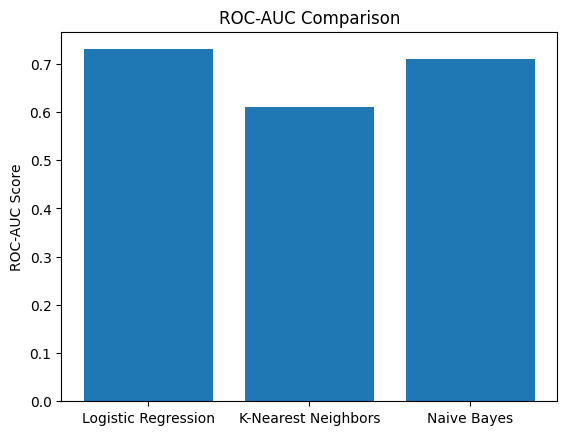

In [22]:
import matplotlib.pyplot as plt

# Example bar plot
models = ["Logistic Regression", "K-Nearest Neighbors", "Naive Bayes"]
auc_scores = [0.73, 0.61, 0.71]

plt.bar(models, auc_scores)
plt.title("ROC-AUC Comparison")
plt.ylabel("ROC-AUC Score")
plt.show()


In [23]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

print('done!')

done!


In [24]:
# Show all performance metrics
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_lr)
print("\nClassification Report (Logistic Regression):\n", classification_report_lr)
print("\nROC-AUC Score (Logistic Regression):", roc_auc_lr)

print('Confusion Matrix:\n', conf_matrix_lr)
print('Classification Report:\n', classification_report_lr)
print('ROC AUC Score:', roc_auc_lr)

print("Confusion Matrix (Naive Bayes):\n", conf_matrix_nb)
print("\nClassification Report (Naive Bayes):\n", classification_report_nb)
print("\nROC-AUC Score (Naive Bayes):", roc_auc_nb)

Confusion Matrix (Logistic Regression):
 [[670   9]
 [105  18]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       679
         1.0       0.67      0.15      0.24       123

    accuracy                           0.86       802
   macro avg       0.77      0.57      0.58       802
weighted avg       0.83      0.86      0.82       802


ROC-AUC Score (Logistic Regression): 0.7386639845779901
Confusion Matrix:
 [[670   9]
 [105  18]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       679
         1.0       0.67      0.15      0.24       123

    accuracy                           0.86       802
   macro avg       0.77      0.57      0.58       802
weighted avg       0.83      0.86      0.82       802

ROC AUC Score: 0.7386639845779901
Confusion Matrix (Naive Bayes):
 [[572 107]
 [ 72  51]]

Classification Report

In [25]:
from sklearn.metrics import classification_report, roc_auc_score

# Training set evaluation
y_train_pred = nb_model.predict(X_train)
y_train_pred_proba = nb_model.predict_proba(X_train)[:, 1]

train_report = classification_report(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)

# Test set evaluation
y_test_pred = nb_model.predict(X_test)
y_test_pred_proba = nb_model.predict_proba(X_test)[:, 1]

test_report = classification_report(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print results
print("Training Set Performance:")
print(train_report)
print("Training ROC-AUC:", train_roc_auc)

print("\nTest Set Performance:")
print(test_report)
print("Test ROC-AUC:", test_roc_auc)


Training Set Performance:
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      2717
         1.0       0.35      0.42      0.38       490

    accuracy                           0.79      3207
   macro avg       0.62      0.64      0.63      3207
weighted avg       0.81      0.79      0.80      3207

Training ROC-AUC: 0.731559042461298

Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86       679
         1.0       0.32      0.41      0.36       123

    accuracy                           0.78       802
   macro avg       0.61      0.63      0.61       802
weighted avg       0.80      0.78      0.79       802

Test ROC-AUC: 0.7129925643880887


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score

# Define hyperparameter grid for Naive Bayes
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Range of values for variance smoothing
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GaussianNB(),
                           param_grid=param_grid,
                           scoring='roc_auc',  
                           cv=5,  
                           verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC-AUC Score from Cross-Validation:", best_score)

# Re-train best model on full training data and evaluate on test set
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

test_report = classification_report(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("\nTest Classification Report:\n", test_report)
print("Test ROC-AUC Score:", test_roc_auc)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'var_smoothing': 1e-09}
Best ROC-AUC Score from Cross-Validation: 0.7269852312471949

Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.84      0.86       679
         1.0       0.32      0.41      0.36       123

    accuracy                           0.78       802
   macro avg       0.61      0.63      0.61       802
weighted avg       0.80      0.78      0.79       802

Test ROC-AUC Score: 0.7129925643880887


Untuned Model Metrics:
Precision (Dead): 0.68
Recall (Dead): 0.15
F1-Score (Dead): 0.25
ROC-AUC: 0.74

Tuned Model Metrics:
Precision (Dead): 0.67
Recall (Dead): 0.15
F1-Score (Dead): 0.24
ROC-AUC: 0.74



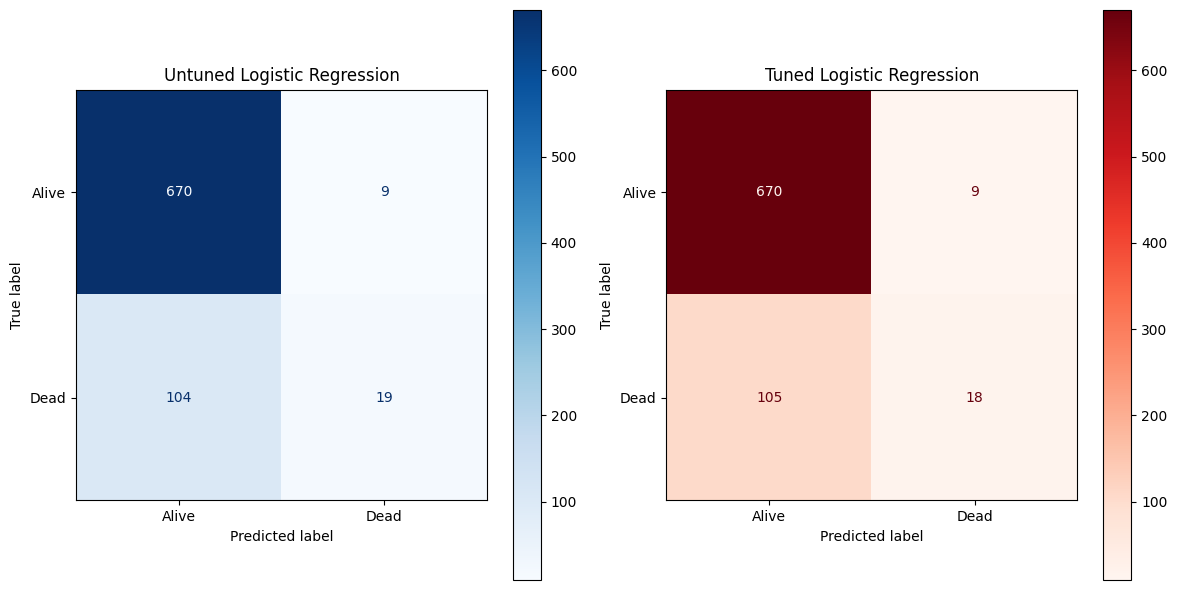

In [27]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt


# Train the untuned Logistic Regression model
untuned_lr_model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
untuned_lr_model.fit(X_train, y_train)

# Predictions for the untuned model
untuned_y_pred_lr = untuned_lr_model.predict(X_test)
untuned_y_proba_lr = untuned_lr_model.predict_proba(X_test)[:, 1]

# Predictions for the tuned model (from GridSearchCV)
tuned_y_pred_lr = grid_lr.best_estimator_.predict(X_test)
tuned_y_proba_lr = grid_lr.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate metrics for untuned model
untuned_precision = precision_score(y_test, untuned_y_pred_lr, pos_label=1)
untuned_recall = recall_score(y_test, untuned_y_pred_lr, pos_label=1)
untuned_f1 = f1_score(y_test, untuned_y_pred_lr, pos_label=1)
untuned_roc_auc = roc_auc_score(y_test, untuned_y_proba_lr)

# Calculate metrics for tuned model
tuned_precision = precision_score(y_test, tuned_y_pred_lr, pos_label=1)
tuned_recall = recall_score(y_test, tuned_y_pred_lr, pos_label=1)
tuned_f1 = f1_score(y_test, tuned_y_pred_lr, pos_label=1)
tuned_roc_auc = roc_auc_score(y_test, tuned_y_proba_lr)

# Compare metrics
print("Untuned Model Metrics:")
print(f"Precision (Dead): {untuned_precision:.2f}")
print(f"Recall (Dead): {untuned_recall:.2f}")
print(f"F1-Score (Dead): {untuned_f1:.2f}")
print(f"ROC-AUC: {untuned_roc_auc:.2f}\n")

print("Tuned Model Metrics:")
print(f"Precision (Dead): {tuned_precision:.2f}")
print(f"Recall (Dead): {tuned_recall:.2f}")
print(f"F1-Score (Dead): {tuned_f1:.2f}")
print(f"ROC-AUC: {tuned_roc_auc:.2f}\n")

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Untuned Model Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, untuned_y_pred_lr, display_labels=['Alive', 'Dead'], cmap='Blues', ax=axes[0])
axes[0].set_title("Untuned Logistic Regression")

# Tuned Model Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, tuned_y_pred_lr, display_labels=['Alive', 'Dead'], cmap='Reds', ax=axes[1])
axes[1].set_title("Tuned Logistic Regression")

plt.tight_layout()
plt.show()
